In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
pokemon = pd.read_csv("D:/dev/DA/pokemon.csv")

In [3]:
print(pokemon.shape)

(807, 14)


In [4]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


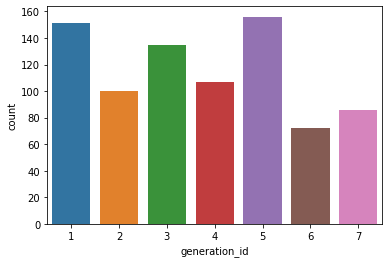

In [5]:
sb.countplot(data=pokemon, x='generation_id');

In [7]:
base_color = sb.color_palette()[0]

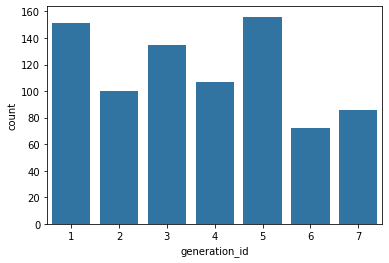

In [8]:
sb.countplot(data=pokemon, x='generation_id', color=base_color);

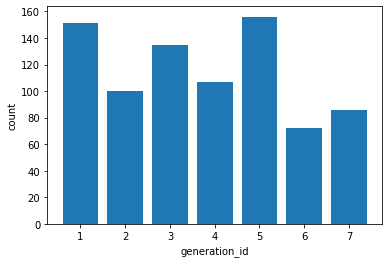

In [9]:
# create a vertical bar chart using MAtplotlib, with a uniform single color

x = pokemon['generation_id'].unique()

#Return the Series having frequency count of each unique value

y = pokemon['generation_id'].value_counts(sort=False)
plt.bar(x,y)

# Labeling the axes

plt.xlabel('generation_id')
plt.ylabel('count')

#Display the plot
plt.show()

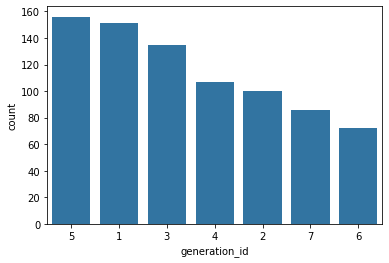

In [12]:
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=[5,1,3,4,7,6])

#Dynamic ordering bars
#The order of the display of the bars ban be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it
# Return a series 

freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the 'generation_id'

sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

<AxesSubplot:xlabel='count', ylabel='type_1'>

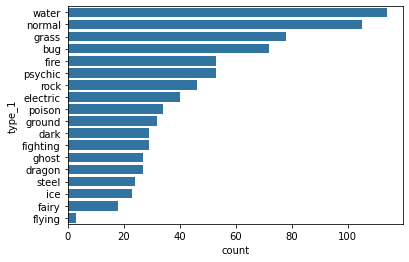

In [13]:
#Rotate the plot clockwise 

type_order = pokemon['type_1'].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order)

In [14]:
# Data wrangling to reshape the pokemon dataframe

pkmn_types = pokemon.melt(id_vars=['id', 'species'], value_vars=['type_1', 'type_2'], var_name='type_level', value_name='type')

pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [15]:
# Count the frequency of unique values in the 'type' column of pkmn_types datafram
# By default, returns the decreasing order of the frequency.

type_counts = pkmn_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [16]:
# Get the unique values of the 'type' column , in the decreasing order of the frequency

type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

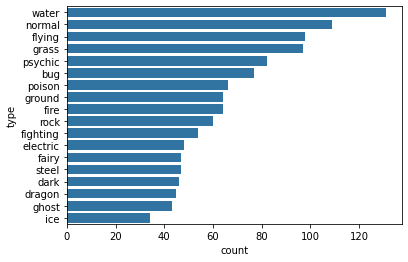

In [17]:
# Plot the horizontal bar charts

base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);


In [18]:
# plot the bar chart having the proportions, instead of the actual count, on one of the axes.

n_pokemon = pkmn_types['type'].value_counts().sum()

#Return the highest frequency in the type column
max_type_count = type_counts[0]

#return the maximum proportion, or in other words,
#compute the length of the longest bar in terms of the proportion

max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [19]:
# Create an array of evenly spaced proportioned values
#Use numpy.arange() function to produce a set of evenly spaced proportioned values
#between 0 and max_prop, with a step size 2\%

tick_props = np.arange(0,max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [20]:
# Create a list of String values that can be used as tick labels

tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

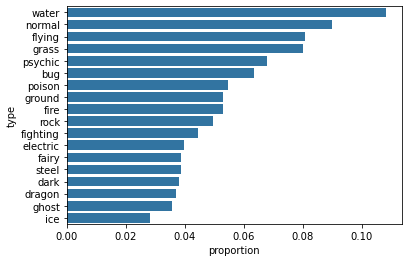

In [21]:
# Plot the bar chart, with new x-tick labels

sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
#Change the tick location and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

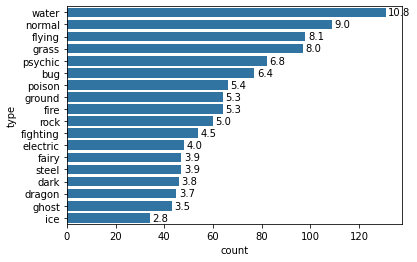

In [24]:
# Print the text(proportion) on the bars of a horizontal plot.

base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

#Logic to print the proportion text on the bars 

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    
    # COnvert count into percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar .
    plt.text(count+1, i, pct_string, va='center')

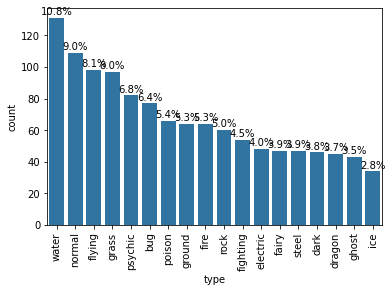

In [26]:
# Print the text (proportion) below the bars of a Vertical Plot

# Considering the same chart from the Example 1 above , print the text proportion
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


#Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels

locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    #get the text property for the label to get the current count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    plt.text(loc, count+2, pct_string, ha='center', color='black')

In [28]:
# Changing the size of the plot to make the text anf figures readable

from matplotlib import rcParams

#Specify the figure size in inches , for both X, Y axes
rcParams['figure.figsize'] = 12,4